In [3]:
import pandas as pd

# Load the game details file
game_details_df = pd.read_csv("/Users/smeetsheth/Documents/Data 240/Project/Data/game_details.csv")

# Load the owned games file
owned_games_df = pd.read_csv("/Users/smeetsheth/Documents/Data 240/Project/Data/ownedGamesFilteredLocation.csv")

# Merge the two files based on the GameID (which is equivalent to appid)
prac_df = pd.merge(owned_games_df, game_details_df, left_on='GameID', right_on='appid', how='inner')

# Select only the required columns
prac_df = prac_df[['SteamID', 'GameID', 'PlaytimeForever (minutes)', 'CountryName', 'CountryCode', 'name', 'developer', 'genre']]

# Optionally, you can save the merged dataframe to a new CSV file
# prac_df.to_csv("prac_owned_games.csv", index=False)

# Display the first few rows of the merged dataframe
print(prac_df.head())


             SteamID  GameID  PlaytimeForever (minutes)     CountryName  \
0  76561197998511283      10                         47         Unknown   
1  76561197969918174      10                          3   United States   
2  76561197991899002      10                        760          Poland   
3  76561197963728455      10                         17   United States   
4  76561198001033415      10                        582  United Kingdom   

  CountryCode            name developer   genre  
0         NaN  Counter-Strike     Valve  Action  
1          US  Counter-Strike     Valve  Action  
2          PL  Counter-Strike     Valve  Action  
3          US  Counter-Strike     Valve  Action  
4          GB  Counter-Strike     Valve  Action  


# Merged the 2 csv files

Displaying the count for the merged file. 

In [4]:
# Get the count of records in the merged file
merged_count = prac_df.shape[0]

# Print the count
print("Number of records in the merged file:", merged_count)


Number of records in the merged file: 203198


Creating a rating field

In [5]:
# Calculate rating score
game_details_df['TotalReviews'] = game_details_df['positive'] + game_details_df['negative']
game_details_df['RatingScore'] = (game_details_df['positive'] / game_details_df['TotalReviews']) * 100

# Convert the rating score to a single decimal point
game_details_df['Rating'] = game_details_df['RatingScore'] / 10

# Merge the rating column to the merged DataFrame based on GameID
prac_df = pd.merge(prac_df, game_details_df[['appid', 'Rating']], left_on='GameID', right_on='appid', how='left')

# Drop the redundant appid column
prac_df.drop(columns=['appid'], inplace=True)


saving the merged file

In [6]:
 prac_df.to_csv("prac_owned_games.csv", index=False)


In [9]:
prac_df.head()

,SteamID,GameID,PlaytimeForever (minutes),CountryName,CountryCode,name,developer,genre,Rating
0,76561197998511283,10,47,Unknown,NaN,Counter-Strike,Valve,Action,9.745642
1,76561197969918174,10,3,United States,US,Counter-Strike,Valve,Action,9.745642
2,76561197991899002,10,760,Poland,PL,Counter-Strike,Valve,Action,9.745642
3,76561197963728455,10,17,United States,US,Counter-Strike,Valve,Action,9.745642
4,76561198001033415,10,582,United Kingdom,GB,Counter-Strike,Valve,Action,9.745642


Displaying top 50 games played

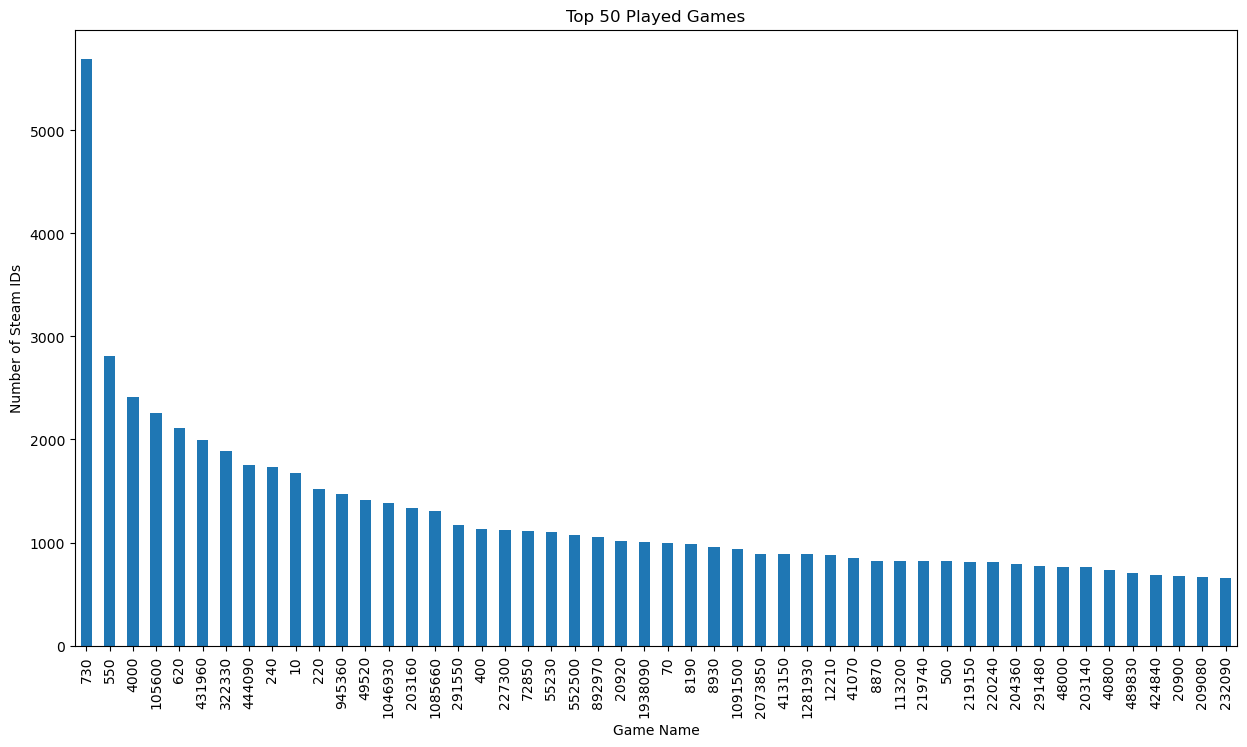

In [6]:
import matplotlib.pyplot as plt

# Calculate the number of unique Steam IDs for each game
steam_ids_per_game = prac_df['GameID'].value_counts()

# Get the top 50 played games
top_50_games = steam_ids_per_game.head(50)

# Create a bar plot for the top 50 games
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
top_50_games.plot(kind='bar')
plt.title('Top 50 Played Games')
plt.xlabel('Game Name')
plt.ylabel('Number of Steam IDs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



Displaying users based on their location


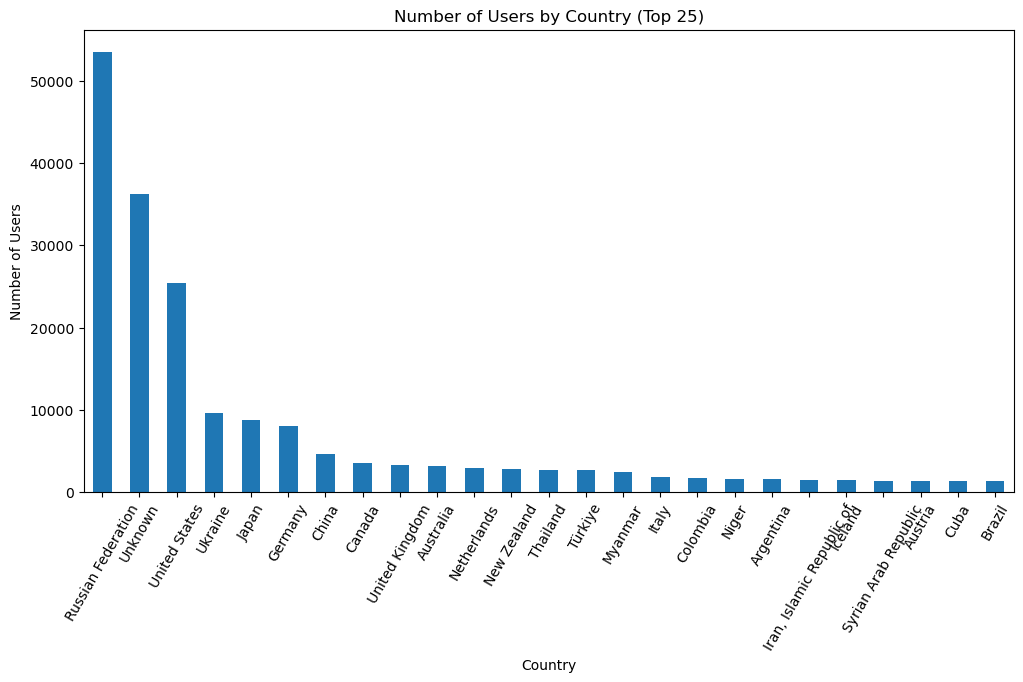

In [19]:
import matplotlib.pyplot as plt

# Calculate the number of users in each country
users_per_country = prac_df['CountryName'].value_counts()

# Select the top 25 countries
top_25_countries = users_per_country.head(25)

# Plot the number of users per country
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
top_25_countries.plot(kind='bar')
plt.title('Number of Users by Country (Top 25)')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()


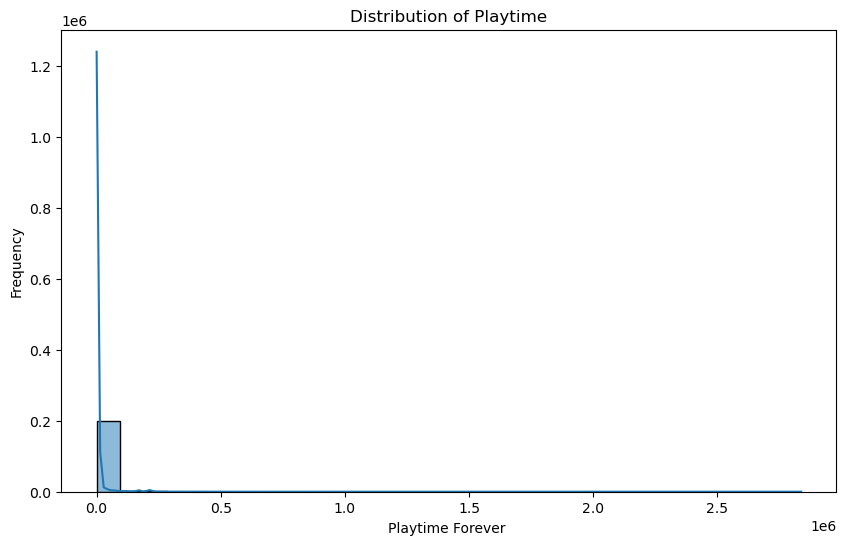

Unique users: 924
Unique games: 3182


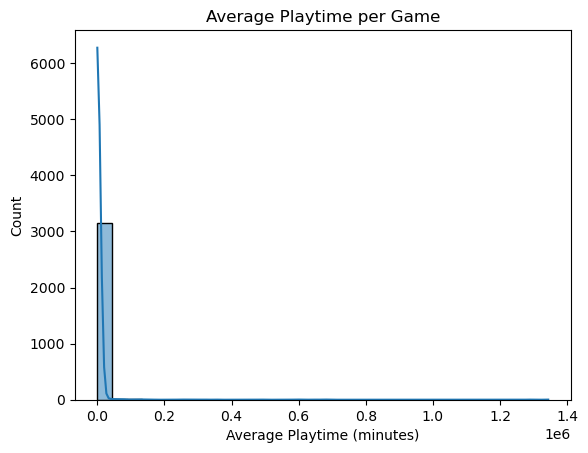

In [9]:
import seaborn as sns



# Visualizing the distribution of playtime
plt.figure(figsize=(10, 6))
sns.histplot(prac_df['PlaytimeForever (minutes)'], bins=30, kde=True)
plt.title('Distribution of Playtime')
plt.xlabel('Playtime Forever ')
plt.ylabel('Frequency')
plt.show()

# Check the number of unique users and games
print("Unique users:", prac_df['SteamID'].nunique())
print("Unique games:", prac_df['GameID'].nunique())

# Average playtime per game
average_playtime_per_game = prac_df.groupby('GameID')['PlaytimeForever (minutes)'].mean()
sns.histplot(average_playtime_per_game, kde=True, bins=30)
plt.title('Average Playtime per Game')
plt.xlabel('Average Playtime (minutes)')
plt.show()


Removing null values

In [20]:
prac_df.dropna(inplace=True)


Data preprocessing

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
prac_df['CountryCode'] = label_encoder.fit_transform(prac_df['CountryCode'])
prac_df['developer'] = label_encoder.fit_transform(prac_df['developer'])
prac_df['genre'] = label_encoder.fit_transform(prac_df['genre'])


In [27]:
scaler = StandardScaler()
prac_df[['PlaytimeForever (minutes)']] = scaler.fit_transform(prac_df[['PlaytimeForever (minutes)']])


Training and testing data

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(prac_df, test_size=0.2, random_state=42)


In [35]:
# Count the number of records in X_train
num_records_train = X_train.shape[0]

# Count the number of records in X_test
num_records_test = X_test.shape[0]

print("Number of records in X_train:", num_records_train)
print("Number of records in X_test:", num_records_test)


Number of records in X_train: 129573
Number of records in X_test: 32394


In [78]:
X_train.head()


,SteamID,GameID,PlaytimeForever (minutes),CountryName,CountryCode,name,developer,genre,Rating
191442,76561198211290956,610180,-0.130099,United States,79,The Jackbox Party Pack 4,1059,318,9.521419
201920,76561198131845373,8790,-0.135037,Japan,44,GTR 2 FIA GT Racing Game,1847,409,9.175258
146853,76561198027914714,444280,-0.129411,Thailand,74,Alice's Patchwork,443,326,8.377358
424,76561198753448869,10,-0.134794,Colombia,18,Counter-Strike,2205,0,9.745642
17269,76561198259048199,730,1.662458,Ukraine,77,Counter-Strike: Global Offensive,2205,134,8.735316


In [76]:
X_test.head()

,SteamID,GameID,PlaytimeForever (minutes),CountryName,CountryCode,name,developer,genre,Rating
9604,76561198058789776,550,-0.116682,Russian Federation,69,Left 4 Dead 2,2205,0,9.755249
43670,76561198211290956,70300,-0.131212,United States,79,VVVVVV,2060,148,9.633480
190716,76561198028399201,331670,-0.134511,Japan,44,The Jackbox Party Pack,1059,318,9.163277
161203,76561198138982537,297020,-0.126456,Russian Federation,69,The Culling Of The Cows,487,127,7.452416
87057,76561198052188624,307230,-0.132082,Russian Federation,69,"I, Zombie",157,318,8.409276


In [39]:
# interaction_matrix = X_train.pivot_table(index='SteamID', columns='GameID', values='PlaytimeForever (minutes)', aggfunc='sum', fill_value=0)


In [41]:
# from sklearn.metrics.pairwise import cosine_similarity

# user_similarity_matrix = cosine_similarity(interaction_matrix)


In [42]:
# def generate_recommendations(user_id, interaction_matrix, user_similarity_matrix, k=5):
#     user_idx = interaction_matrix.index.get_loc(user_id)
#     similar_users = user_similarity_matrix[user_idx]
#     similar_user_indices = similar_users.argsort()[::-1][1:k+1]  # Exclude the user itself
#     recommendations = []
#     for idx in similar_user_indices:
#         similar_user_id = interaction_matrix.index[idx]
#         games_played_by_similar_user = interaction_matrix.iloc[idx]
#         games_not_played_by_user = games_played_by_similar_user[games_played_by_similar_user == 0].index
#         recommendations.extend(games_not_played_by_user)
#     return recommendations


In [52]:
# def generate_recommendations(SteamID, interaction_matrix, user_similarity_matrix, k=5, threshold=0.5, max_recommendations=6):
#     recommendations = []
#     # Get the similarity scores for the target user
#     user_similarity_scores = user_similarity_matrix.loc[SteamID]
#     # Sort the users based on similarity scores in descending order
#     similar_users = user_similarity_scores.sort_values(ascending=False)
#     # Select the top k similar users
#     similar_users = similar_users.head(k)
#     for similar_user_id, similarity_score in similar_users.items():
#         # Check if similarity score meets the threshold
#         if similarity_score >= threshold:
#             # Get games played by similar user but not by target user
#             user_games = interaction_matrix.loc[similar_user_id]
#             target_user_games = interaction_matrix.loc[SteamID]
#             new_games = user_games.index.difference(target_user_games.index)
#             # Add new games to recommendations list
#             recommendations.extend(new_games)
#             # Check if the number of recommendations exceeds the maximum limit
#             if len(recommendations) >= max_recommendations:
#                 break
#     # Return the top max_recommendations games
#     return recommendations[:max_recommendations]


In [53]:
# def evaluate_model(X_test, interaction_matrix, user_similarity_matrix, k=5):
#     predictions = []
#     for _, row in X_test.iterrows():
#         user_id = row['SteamID']
#         recommendations = generate_recommendations(user_id, interaction_matrix, user_similarity_matrix, k)
#         predicted_playtime = interaction_matrix.loc[user_id, recommendations].sum()
#         actual_playtime = row['PlaytimeForever']
#         predictions.append((predicted_playtime, actual_playtime))
#     rmse = sqrt(mean_squared_error([pred[1] for pred in predictions], [pred[0] for pred in predictions]))
#     return rmse

In [74]:
# interaction_matrix = prac_df(interaction_matrix, index=[user_id], columns=GameID)
# user_similarity_matrix = prac_df(user_similarity_matrix, index=[user_id], columns=user_id)



NameError: name 'GameID' is not defined

In [71]:
# import pandas as pd

# # Assuming 'data' is your numpy.ndarray object
# # Convert numpy array to pandas DataFrame
# df = pd.DataFrame(prac_df)

# # Now you can access the columns attribute
# columns = df.columns


In [49]:

# user_id = 76561198001033415
# recommendations = generate_recommendations(user_id, interaction_matrix, user_similarity_matrix, k=5)
# print("Recommendations for user", user_id, ":", recommendations)


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [87]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the dataset (in a format suitable for Surprise)
reader = Reader(rating_scale=(0, 10))  # Assuming playtime values are on a scale of 0 to 10
data = Dataset.load_from_df(df[['SteamID', 'GameID', 'PlaytimeForever (minutes)']], reader)

# Split the dataset into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use SVD for matrix factorization
model = SVD()
model.fit(trainset)

# Generate predictions for the test set
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

# Generate recommendations for a specific user
user_id = '76561198001033415'
user_items = df[df['SteamID'] == user_id]['GameID'].unique()
user_unseen_items = df['GameID'].unique() - user_items
user_unseen_items = [{'SteamID': user_id, 'GameID': item} for item in user_unseen_items]
user_predictions = model.test(user_unseen_items)
user_recommendations = [(pred.iid, pred.est) for pred in user_predictions]
user_recommendations.sort(key=lambda x: x[1], reverse=True)
top_recommendations = user_recommendations[:5]
print("Top recommendations for user", user_id, ":", top_recommendations)


RMSE: 1.0030


ValueError: operands could not be broadcast together with shapes (3023,) (0,) 

In [93]:
# Generate recommendations for a specific user
user_id = '76561198001033415'
user_items = set(df[df['SteamID'] == user_id]['GameID'].unique())
all_items = set(df['GameID'].unique())
user_unseen_items = list(all_items - user_items)

# Create a list to store (item_id, estimated_rating) tuples
user_recommendations = []

# Predict the rating for each unseen item for the user
for item_id in user_unseen_items:
    # Predict the rating for the user-item pair
    estimated_rating = model.predict(user_id, item_id).est
    user_recommendations.append((item_id, estimated_rating))

# Sort the recommendations by estimated rating in descending order
user_recommendations.sort(key=lambda x: x[1], reverse=True)

# Select top recommendations
top_recommendations = user_recommendations[:5]

print("Top recommendations for user", user_id, ":", top_recommendations)


Top recommendations for user 76561198001033415 : [(594330, 2.250824951659054), (730, 2.194935444340663), (616720, 1.4693916433354417), (224820, 1.404514190048088), (914260, 0.8596420541828426)]


In [112]:
# Generate recommendations for a specific user
user_id = '76561197996837203'
user_items = set(df[df['SteamID'] == user_id]['GameID'].unique())
all_items = set(df['GameID'].unique())
user_unseen_items = list(all_items - user_items)

# Create a list to store (item_id, item_name, estimated_rating) tuples
user_recommendations = []

# Predict the rating for each unseen item for the user
for item_id in user_unseen_items:
    # Predict the rating for the user-item pair
    estimated_rating = model.predict(user_id, item_id).est
    # Get the name of the game
    game_name = df[df['GameID'] == item_id]['name'].values[0]  # Assuming each game has a unique name
    user_recommendations.append((item_id, game_name, estimated_rating))

# Sort the recommendations by estimated rating in descending order
user_recommendations.sort(key=lambda x: x[2], reverse=True)

# Select top recommendations
top_recommendations = user_recommendations[:5]

print("Top recommendations for user", user_id, ":")
for item_id, game_name, rating in top_recommendations:
    print("Game ID:", item_id, ", Game Name:", game_name, ", Rating:", rating)


Top recommendations for user 76561197996837203 :
Game ID: 730 , Game Name: Counter-Strike: Global Offensive , Rating: 2.2213225670027184
Game ID: 594330 , Game Name: Visage , Rating: 2.1683514810894677
Game ID: 639170 , Game Name: Minecraft: Story Mode - Season Two , Rating: 1.5667719181904336
Game ID: 616720 , Game Name: Live2DViewerEX , Rating: 1.559437839642867
Game ID: 224820 , Game Name: Super House of Dead Ninjas , Rating: 1.1735614171856603


In [105]:
from surprise.model_selection import cross_validate

# Perform cross-validation
cv_results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

# Extract and print the average RMSE score
avg_rmse = cv_results['test_rmse'].mean()
print("Average RMSE:", avg_rmse)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9743  0.9532  0.6465  0.7205  0.6766  0.7942  0.1406  
Fit time          0.09    0.07    0.07    0.07    0.07    0.08    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Average RMSE: 0.7942103361694198


In [108]:
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.prediction_algorithms import Prediction

# Define a custom function to compute precision, recall, and F1 score
def precision_recall_f1(predictions, threshold=3.5):
    # Convert predictions to binary values (1 for positive, 0 for negative)
    bin_predictions = [1 if pred.est >= threshold else 0 for pred in predictions]
    
    # Extract ground truth ratings
    true_ratings = [pred.r_ui for pred in predictions]
    
    # Compute precision, recall, and F1 score
    precision = accuracy.precision(bin_predictions, true_ratings)
    recall = accuracy.recall(bin_predictions, true_ratings)
    f1_score = accuracy.f1(bin_predictions, true_ratings)
    
    return precision, recall, f1_score

# Perform cross-validation
cv_results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True, return_train_measures=True)

# Extract and print the average RMSE score
avg_rmse = cv_results['test_rmse'].mean()
print("Average RMSE:", avg_rmse)

# Check if 'predictions' key exists in cv_results
if 'predictions' in cv_results:
    # Extract the predictions from each fold
    all_predictions = []
    for fold_predictions in cv_results['predictions']:
        all_predictions.extend(fold_predictions)

    # Compute precision, recall, and F1 score
    precision, recall, f1_score = precision_recall_f1(all_predictions)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
else:
    print("No predictions found in cv_results.")


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8064  0.8158  0.9507  0.7313  0.7233  0.8055  0.0818  
RMSE (trainset)   0.5635  0.5757  0.5336  0.5645  0.6040  0.5683  0.0227  
Fit time          0.09    0.07    0.07    0.07    0.07    0.08    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Average RMSE: 0.8054972893839834
No predictions found in cv_results.
